In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import rpy2 as rpy2

In [44]:
%matplotlib inline
%load_ext rpy2.ipython
plt.rcParams['figure.figsize'] = [9,6]

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Computer Simulations STAT2005

### Lecture 2 - Random Number Generator and Discrete Random Variables 

### Motivation

- Need to be able to simulate randomness.
- Computer algorithms are inherently deterministics. 
- Need to mimick random behaviour that follows certin probabitlity distribution. 
- How? 
- Create algorithm to generate a sequence of numbers that "look" random.
- It is possible, recall the logistic map. 
- Pseudo Number Generator.

### How? 

- The most basic and common type of pseudo number generator is the **Linear Congruential Generator** (LCG).
- We need to introduce a basic concept called *modular arithmatic*.
- Put it simply, it is the arithmatic of the remainder. 



### Modular Arithmetic 

Let $a,b,n \in \mathbb{Z}$ then $a$ and $b$ are congurent modulo $n$ written as 

$$ a \equiv b \quad (\text{mod } n)$$

if 

$$ a=nk + b$$ 


for some $k\in \mathbb{Z}$. 

We can look at this definition in a few different ways:

1. The difference between $a$ and $b$ is divisible by $n$. 
2. If $b<n$, then $b$ is the remainder of $a$ divided by $n$. 
3. $a$ and $b$ has a common remainder after dividing by $n$. 

Some Examples:

- $0 \equiv 6$ $(\text{mod } 3)$
- $4 \equiv 24$ $(\text{mod } 5)$
- $-11 \equiv 145$ $(\text{mod } 12)$

### Lineare Congruential Generator

Consider the following difference equation:

$$ y_{t+1} = (Ay_t + B) \quad (\text{mod } m)$$

where $0<A<m$, $0\leq B < m$ and $m$ are fixed integers. $A$, $B$ and $m$ are often called the multiplier, increment and modulus, respectively. When $B=0$, this is called the multiplicative congruential generator. 

To start the process, we need an initial value, $y_0 \in [0,m-1]$. Consider the case where $A=127$, $B=7$, $m=511$ and $y_0=1$.

In [28]:
def LCG(N, A, B, m, y0):
    """
    An implementation of the linear congruential generator. 
    Inputs:
        N: int. The number of pseudo number generator. 
        A: int. The multipler.
        B: int. The increment.
        m: int. Modulus. 
        y0: int in [0, m-1]. The initial value. 
    Output:
        y: (N,) numpy array. 
    """
    
    if (y0 <0)|(y0>=m):
        print("The initial value cannot be negative or greater than the modulus.") 
    elif (A>=m)|(A<0):
        print("The multiplier cannot be negative or greater than the modulus.")
    elif (B>=m)|(B<0):
        print("The increment cannot be negative or greater than the modulus.")
    else:
        y = np.zeros(N+1)
        y[0] = y0
        for t in np.arange(N):
            y[t+1] = (A*y[t]+B)%m
    return y[1:N+1]/m

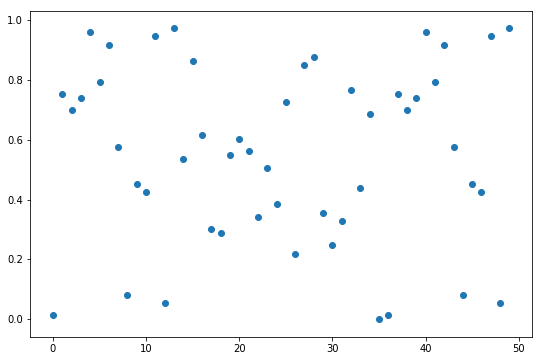

In [45]:
N,A,B,m,y0 = 50,127,7,511,0
y = LCG(N, A, B, m, y0)
xrange = np.arange(N)
plt.scatter(xrange,y)

So that looks promising. What if we generate 500 rather 50 numbers? 

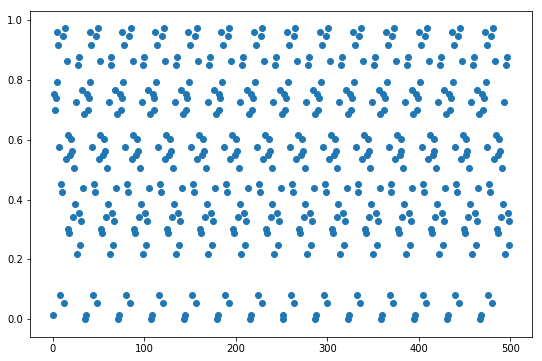

In [46]:
N = 500
y1 = LCG(N, A, B, m, y0)
xrange = np.arange(N)
plt.scatter(xrange, y1)

Oops.... pattern repeated. What is happening? 
Let's try a differnt modulus. $m=2^{128}$

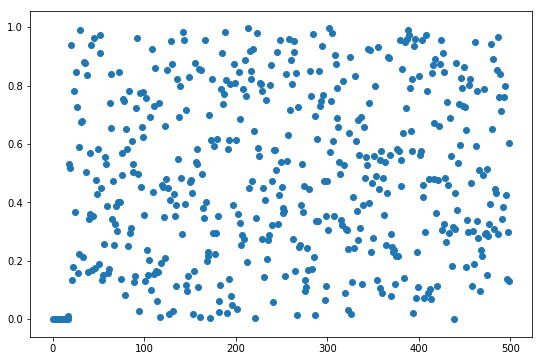

In [47]:
m = int(2**128)
y2 = LCG(N,A,B,m,y0)
plt.scatter(xrange, y2)